利用ARIMA模型预测未来三年的数据

In [3]:
import json
import pandas as pd

from __future__ import annotations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # ACF与PACF
from statsmodels.tsa.arima.model import ARIMA  # ARIMA模型
from statsmodels.graphics.api import qqplot  # qq图
from scipy import stats

In [4]:
with open('../output_data/centrality.json','r',encoding='utf-8') as f:
    jsonData=json.load(f)

print(jsonData["closeness"][0])

{'cluster': 1, 'topic': 0, 'year': 2016, 'value': 0.0}


In [194]:
current_type = "paperCounts"
current_cluster=2
current_topic = 7

In [195]:
# 选择cluster
need_data=[]
for i in jsonData[current_type]:
    if i["cluster"]==current_cluster:
        need_data.append((i["topic"],i["year"],i["value"]))

print(need_data)

[(0, 2016, 0), (1, 2016, 1), (2, 2016, 0), (3, 2016, 1), (4, 2016, 0), (5, 2016, 0), (6, 2016, 1), (7, 2016, 1), (0, 2017, 0), (1, 2017, 1), (2, 2017, 2), (3, 2017, 1), (4, 2017, 1), (5, 2017, 0), (6, 2017, 4), (7, 2017, 1), (0, 2018, 1), (1, 2018, 1), (2, 2018, 4), (3, 2018, 4), (4, 2018, 2), (5, 2018, 0), (6, 2018, 5), (7, 2018, 1), (0, 2019, 2), (1, 2019, 2), (2, 2019, 6), (3, 2019, 5), (4, 2019, 2), (5, 2019, 0), (6, 2019, 5), (7, 2019, 6), (0, 2020, 4), (1, 2020, 3), (2, 2020, 7), (3, 2020, 5), (4, 2020, 2), (5, 2020, 1), (6, 2020, 7), (7, 2020, 7), (0, 2021, 4), (1, 2021, 6), (2, 2021, 11), (3, 2021, 6), (4, 2021, 2), (5, 2021, 2), (6, 2021, 7), (7, 2021, 8), (0, 2022, 5), (1, 2022, 11), (2, 2022, 14), (3, 2022, 9), (4, 2022, 2), (5, 2022, 2), (6, 2022, 7), (7, 2022, 8), (0, 2023, 5), (1, 2023, 12), (2, 2023, 17), (3, 2023, 12), (4, 2023, 3), (5, 2023, 4), (6, 2023, 9), (7, 2023, 10), (0, 2024, 6), (1, 2024, 18), (2, 2024, 21), (3, 2024, 14), (4, 2024, 4), (5, 2024, 9), (6, 2024,

In [196]:
# 选择topic
x = [i[1] for i in need_data if i[0] == current_topic]
y = [i[2] for i in need_data if i[0] == current_topic]
print(x)
print(y)

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
[1, 1, 1, 6, 7, 8, 8, 10, 11]


In [197]:
data = {
    "time_data": pd.to_datetime(x, format="%Y"),
    "deal_data": y,
}

df = pd.DataFrame(data)

df.set_index(["time_data"], inplace=True)  # 将时间戳设置为索引

data = df
print(data)

            deal_data
time_data            
2016-01-01          1
2017-01-01          1
2018-01-01          1
2019-01-01          6
2020-01-01          7
2021-01-01          8
2022-01-01          8
2023-01-01         10
2024-01-01         11


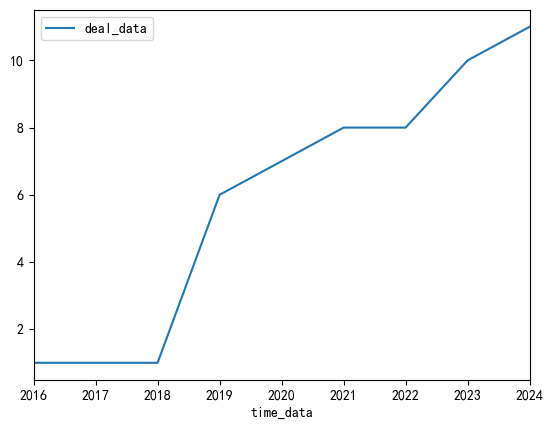

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19384\2940369855.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_acf(data).show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19384\2940369855.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_pacf(data).show()


原始序列的ADF检验结果为： (np.float64(-0.49211662332187156), np.float64(0.8935457253586057), 0, 8, {'1%': np.float64(-4.6651863281249994), '5%': np.float64(-3.3671868750000002), '10%': np.float64(-2.802960625)}, np.float64(19.27293461752091))


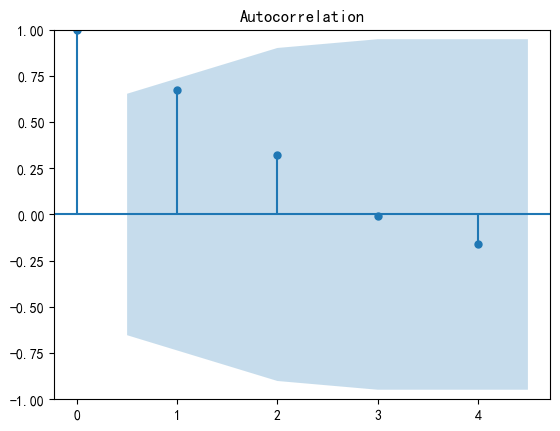

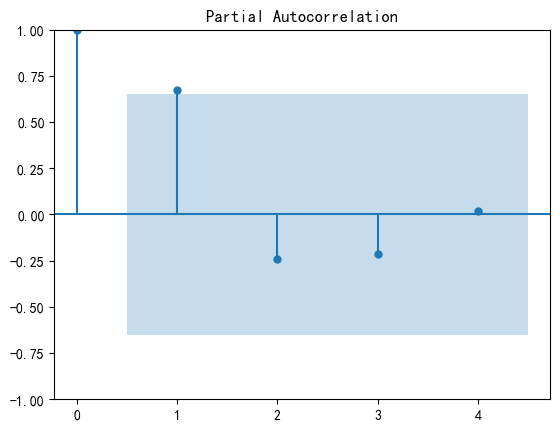

In [198]:
# 用来正常显示中文标签
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号
# 绘图
data.plot()
# 图片展示
plt.show()

# 绘制自相关图
plot_acf(data).show()
# 绘制偏自相关图
plot_pacf(data).show()
# 平稳性检测
adf_result = ADF(data)
print("原始序列的ADF检验结果为：", adf_result)
count=0     # 阶数
# 第二个参数大于0.05说明数据不稳定

数据不是平稳的，需要差分
差分后 ADF p-value: (np.float64(-5.4242219446599265), np.float64(3.0122007814364082e-06), 2, 5, {'1%': np.float64(-6.045114), '5%': np.float64(-3.9292800000000003), '10%': np.float64(-2.98681)}, np.float64(6.49083102362148))
阶数为：1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19384\452630537.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_pacf(data_diff).show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19384\452630537.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_acf(data_diff).show()


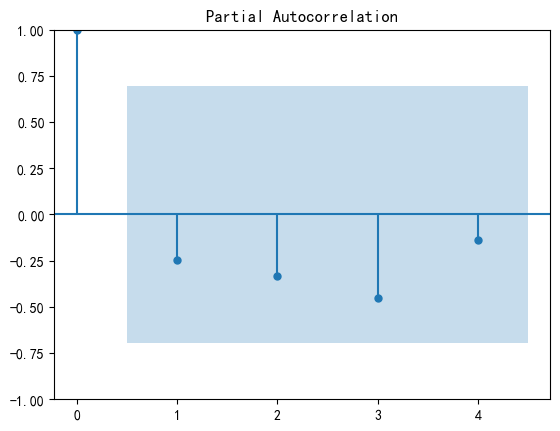

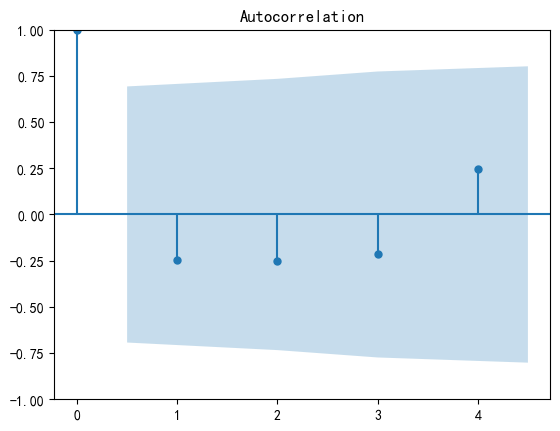

In [199]:
# 如果p-value大于0.05，说明数据可能不是平稳的，需要差分
data_diff=data
if adf_result[1] > 0.05:
    print("数据不是平稳的，需要差分")
    count += 1
    # 差分化
    data_diff = data_diff.diff().dropna()
    # 再次进行平稳性检验
    adf_result_diff = ADF(data_diff)
    print(f"差分后 ADF p-value: {adf_result_diff}")
print("阶数为：%s"%count)
# 偏自相关图
plot_pacf(data_diff).show()
# 自相关图
plot_acf(data_diff).show()

In [200]:
# 选择pdq
pmax = int(len(data_diff) / 2)
qmax = int(len(data_diff) / 2)
bic_matrix = []  # BIC矩阵
# 差分阶数
diff_num = count

for p in range(pmax):
    tmp = []
    for q in range(qmax):
        try:
            tmp.append(ARIMA(data_diff, order=(p, diff_num, q)).fit().bic)
        except Exception as e:
            print(e)
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix)  # 从中可以找出最小值
p, q = bic_matrix.stack().idxmin()  # 先用stack展平，然后用idxmin找出最小值位置。
print("BIC最小的p值和q值为：%s、%s" % (p, q))
print("阶数为：%s" % diff_num)

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\b

BIC最小的p值和q值为：0、1
阶数为：1


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters

In [201]:
# 构建ARIMA模型
model = ARIMA(data, order=(p, diff_num, q))
model_fit = model.fit()

# 进行预测，预测未来一年（2025年）
forecast = model_fit.forecast(steps=1)  # 预测1步

# 显示预测结果
print(f"预测2025年的发文数量: {forecast[0]}")

预测2025年的发文数量: 11.110673810369134


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19384\769712462.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"预

In [202]:
# 新的数据加入excel中
new_data = pd.read_excel("../output_data/forecast_data.xlsx",index_col=0)
new_data.loc[len(new_data)] = {
        "type": current_type,
        "cluster": current_cluster,
        "topic": current_topic,
        "2025": forecast[0],
    }
# new_data=pd.DataFrame([
#     {
#         "type": current_type,
#         "cluster": current_cluster,
#         "topic": current_topic,
#         "2025": forecast[0],
#     }
# ])

new_data.to_excel('../output_data/forecast_data.xlsx')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19384\1111935559.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "2025": forecast[0],


In [203]:
new_data = pd.read_excel("../output_data/forecast_data.xlsx", index_col=0)
print(new_data.tail())

           type  cluster  topic       2025
11  paperCounts        2      3  14.000000
12  paperCounts        2      4   4.000000
13  paperCounts        2      5  11.777769
14  paperCounts        2      6  12.263793
15  paperCounts        2      7  11.110674
